# Import Relevant libraries

In [1]:
# dataset
import numpy as np
import tensorflow as tf
from numpy import genfromtxt
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
print(tf.__version__)
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(0) # please do not remove this line
tf.random.set_seed(0)

data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

# shuffle
idx = np.arange(data.shape[0])
np.random.shuffle(idx)
data = data[idx]

N = data.shape[0]
X = data[:,:-1]
y = data[:,-1:]

# normalize data
maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X-avg) / (maxi-mini)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

2.9.1
(160, 3)


# Creating a Model

In [2]:
# Define model
#built the neural network architecture
model = Sequential()
model.add(keras.Input(shape=(3,)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd', metrics=['mse', 'mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


# Training the Model

In [3]:
#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 0s 34ms/step - loss: 244.8083 - mse: 244.8083 - mae: 14.6546 - val_loss: 227.9758 - val_mse: 227.9758 - val_mae: 14.2066
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 207.8164 - mse: 207.8164 - mae: 13.3768 - val_loss: 193.8958 - val_mse: 193.8958 - val_mae: 12.9866
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 176.9576 - mse: 176.9576 - mae: 12.1936 - val_loss: 165.4018 - val_mse: 165.4018 - val_mae: 11.8736
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 151.0364 - mse: 151.0364 - mae: 11.1638 - val_loss: 141.4886 - val_mse: 141.4886 - val_mae: 10.8546
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 129.4088 - mse: 129.4088 - mae: 10.2156 - val_loss: 121.4363 - val_mse: 121.4363 - val_mae: 9.9225
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 111.2769 - mse: 111.2769 - mae: 9.3534 - val_loss: 104.6392 - val_mse: 104

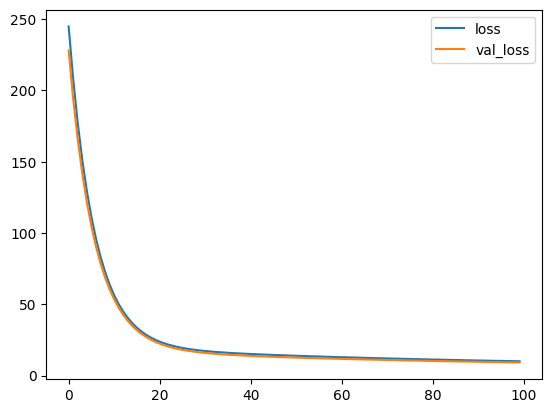

In [4]:
#plot the loss and validation loss of the dataset
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [5]:
#evaluate the model
model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 63ms/step - loss: 7.8225 - mse: 7.8225 - mae: 2.2955


[7.822534084320068, 7.822534084320068, 2.295454978942871]

In [6]:
# Best LOSS, MSE, MAE with 100 epochs: (loss: 7.2985 - mse: 7.2985 - mae: 2.1271)

In [7]:
# Best LOSS, MSE, MAE with 200 epochs:(loss: 4.5121 - mse: 4.5121 - mae: 1.6450)

2/2 [==============================] - 0s 2ms/step


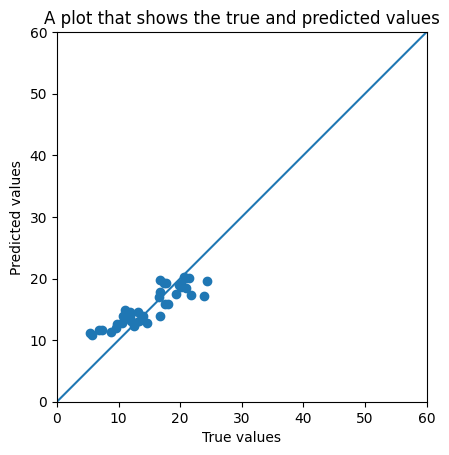

In [8]:
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])